In [6]:
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set()

In [7]:
data_df = pd.read_csv('../data/all_tips_data_new.csv')
print data_df.shape
data_df.head()

(388, 28)


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds
0,0.0,1.0,1.0,0.0,0,0,0,1,0,0,1,0,0,1.0,0.0,0.0,0.0,0.773585,147.0,68.0,55.0,269.2,97.0,27231,38,371,14,3
1,0.0,0.0,0.0,0.0,0,1,1,1,0,0,1,0,0,1.0,0.0,0.0,1.0,0.520000,135.0,74.0,69.0,195.8,96.0,30058,21,353,7,4
2,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.529412,122.0,78.0,61.0,250.7,97.0,24340,18,357,2,2
3,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.830189,144.0,86.0,72.0,152.1,93.0,32057,49,371,3,1
4,1.0,0.0,1.0,0.0,0,0,1,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.730769,139.0,81.0,81.0,231.7,95.0,25568,36,364,3,2


In [8]:
data_df['lang_spanish'].value_counts()

0.0    327
1.0     61
Name: lang_spanish, dtype: int64

In [9]:
data_df[data_df['lang_spanish']==1]['copd'].value_counts()

0    56
1     5
Name: copd, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BF9C048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C7E1470>]], dtype=object)

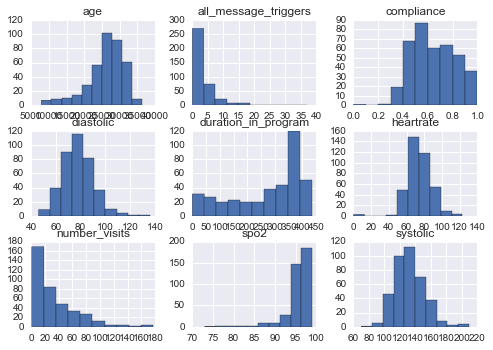

In [11]:
continuous_feats = ['age','compliance','spo2','heartrate','diastolic','systolic','number_visits','duration_in_program','all_message_triggers']

data_df[continuous_feats].hist()

In [12]:
for feature in continuous_feats:
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data_df[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data_df[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    print (data_df[~((data_df[feature] >= Q1 - step) & (data_df[feature] <= Q3 + step))]).index
    display(data_df[~((data_df[feature] >= Q1 - step) & (data_df[feature] <= Q3 + step))])
    

Data points considered outliers for the feature 'age':
Int64Index([170, 177, 179, 180, 196, 200, 206, 210, 213, 216, 218, 219, 221,
            224, 226, 231, 232, 236, 237, 269],
           dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds
170,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.500000,112.0,72.0,63.0,185.4,99.0,13576,4,21,0,0
177,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.413043,133.0,91.0,109.0,230.8,98.0,11306,11,326,1,0
179,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.513514,142.0,97.0,104.0,185.6,97.0,13362,25,339,1,1
180,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.423077,118.0,90.0,82.0,195.3,99.0,10058,9,210,0,1
196,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.500000,108.0,74.0,74.0,204.4,98.0,9947,4,46,3,1
200,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.595745,94.0,74.0,63.0,134.9,98.0,12217,23,329,20,0
206,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,1.000000,98.0,63.0,67.0,135.0,99.0,13963,13,56,0,0
210,1.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.720000,102.0,67.0,85.0,132.9,99.0,10636,56,350,1,1
213,1.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.648649,142.0,101.0,70.0,196.9,94.0,15178,55,322,1,1
216,1.0,0.0,1.0,0.0,0,0,1,0,0,0,1,0,1,1.0,0.0,0.0,1.0,0.604167,146.0,99.0,97.0,245.4,97.0,13480,32,336,17,3


Data points considered outliers for the feature 'compliance':
Int64Index([137], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds
137,0.0,0.0,0.0,0.0,0,0,0,1,0,1,0,0,0,1.0,1.0,1.0,1.0,0.0,92.0,71.0,69.0,116.0,97.0,24288,5,112,1,3


Data points considered outliers for the feature 'spo2':
Int64Index([ 31,  87, 120, 142, 151, 160, 182, 191, 228, 232, 241, 242, 273,
            286, 287, 289, 290, 295, 314, 323, 328, 329, 339, 342, 350, 358,
            371],
           dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds
31,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.943396,90.0,72.0,87.0,159.8,88.0,34190,90,374,8,0
87,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.460000,118.0,52.0,57.0,111.0,80.0,32282,22,378,0,0
120,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,1.0,0.872727,136.0,77.0,89.0,134.9,87.0,26130,84,385,2,0
142,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.400000,152.0,90.0,71.0,119.3,88.0,28871,11,360,10,0
151,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.773585,122.0,72.0,87.0,179.7,87.0,30396,63,374,5,0
160,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.631579,121.0,58.0,78.0,147.0,90.0,26255,11,140,1,1
182,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.840000,126.0,90.0,67.0,194.0,76.0,17174,78,350,1,0
191,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.673469,98.0,76.0,83.0,164.2,73.0,21915,41,343,8,2
228,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.500000,116.0,83.0,98.0,119.3,90.0,17161,6,45,8,0
232,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.833333,133.0,89.0,73.0,189.2,82.0,11948,15,67,2,0


Data points considered outliers for the feature 'heartrate':
Int64Index([74, 174, 177, 193, 203, 209, 297, 309, 313, 366], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds
74,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.607843,120.0,86.0,123.0,178.1,97.0,29497,36,367,1,0
174,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,1.000000,112.0,80.0,107.0,215.8,94.0,21289,41,332,10,1
177,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.413043,133.0,91.0,109.0,230.8,98.0,11306,11,326,1,0
193,1.0,1.0,1.0,0.0,0,0,1,1,1,0,0,0,0,1.0,0.0,0.0,1.0,0.392857,159.0,102.0,109.0,229.3,97.0,24697,4,238,4,3
203,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.550000,127.0,103.0,113.0,202.4,97.0,22674,14,143,0,1
209,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.585366,144.0,96.0,109.0,145.1,99.0,20329,27,287,10,0
297,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.870968,117.0,58.0,0.0,159.0,94.0,25759,125,427,7,2
309,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,1.0,0.0,0.0,1.0,0.754098,140.0,66.0,0.0,159.0,97.0,31184,72,415,1,2
313,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.512195,159.0,80.0,118.0,97.2,96.0,31375,24,392,0,0
366,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.750000,131.0,62.0,0.0,158.0,93.0,32681,16,119,0,1


Data points considered outliers for the feature 'diastolic':
Int64Index([226, 230, 231, 336, 349], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds
226,1.0,1.0,0.0,0.0,0,0,0,0,0,0,1,0,1,1.0,0.0,0.0,1.0,0.428571,150.0,110.0,81.0,260.4,97.0,14833,4,196,1,2
230,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.523810,145.0,136.0,64.0,185.8,98.0,21522,12,147,5,0
231,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.600000,154.0,118.0,84.0,159.0,98.0,13696,8,42,3,0
336,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,1,0,1.0,0.0,0.0,0.0,0.559322,157.0,111.0,85.0,219.4,94.0,29670,38,378,2,3
349,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.791667,164.0,114.0,63.0,156.0,97.0,32234,42,168,3,1


Data points considered outliers for the feature 'systolic':
Int64Index([17, 30, 95, 185, 235, 284, 346, 359, 361], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds
17,0.0,1.0,0.0,1.0,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,1.0,0.857143,199.0,101.0,71.0,133.0,97.0,28114,5,32,1,1
30,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.711538,205.0,91.0,72.0,172.0,94.0,27544,82,374,1,1
95,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.860000,182.0,94.0,69.0,259.9,96.0,26636,66,350,6,0
185,1.0,0.0,1.0,0.0,0,0,1,0,0,0,1,0,0,1.0,0.0,0.0,1.0,0.740000,205.0,108.0,66.0,181.4,98.0,19564,50,353,18,2
235,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.714286,193.0,84.0,75.0,185.0,99.0,20417,6,49,0,1
284,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.285714,180.0,82.0,62.0,165.6,93.0,33327,3,22,0,1
346,1.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.842105,70.0,48.0,58.0,161.6,96.0,25738,86,399,4,2
359,0.0,0.0,0.0,0.0,0,0,1,1,0,0,1,0,0,1.0,0.0,0.0,0.0,0.534483,183.0,87.0,70.0,281.7,93.0,25019,29,393,2,3
361,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.769231,209.0,95.0,61.0,160.9,94.0,31769,15,98,0,1


Data points considered outliers for the feature 'number_visits':
Int64Index([279, 281, 285, 286, 287, 288, 290, 295, 297, 355], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds
279,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.904762,120.0,81.0,68.0,150.4,97.0,27111,169,427,1,1
281,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.873016,136.0,62.0,72.0,196.2,96.0,29801,177,429,3,2
285,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.888889,134.0,96.0,65.0,192.2,98.0,22845,149,428,13,0
286,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.825397,133.0,74.0,76.0,162.3,82.0,31897,120,434,10,0
287,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.857143,123.0,92.0,77.0,215.6,85.0,29323,143,435,5,1
288,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.421053,155.0,74.0,76.0,178.0,98.0,25202,127,428,5,1
290,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.852459,127.0,71.0,80.0,221.6,88.0,25048,167,428,0,2
295,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.841270,159.0,84.0,64.0,186.5,91.0,31457,127,429,16,1
297,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.870968,117.0,58.0,0.0,159.0,94.0,25759,125,427,7,2
355,0.0,0.0,0.0,0.0,0,1,1,1,0,0,1,0,0,1.0,0.0,0.0,0.0,0.512195,167.0,100.0,76.0,218.3,95.0,26129,120,428,18,4


Data points considered outliers for the feature 'duration_in_program':
Int64Index([], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds


Data points considered outliers for the feature 'all_message_triggers':
Int64Index([  0,  62,  90, 119, 136, 150, 161, 173, 175, 181, 184, 185, 187,
            189, 197, 200, 216, 246, 282, 285, 295, 304, 323, 326, 337, 355,
            368],
           dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds
0,0.0,1.0,1.0,0.0,0,0,0,1,0,0,1,0,0,1.0,0.0,0.0,0.0,0.773585,147.0,68.0,55.0,269.2,97.0,27231,38,371,14,3
62,1.0,1.0,1.0,0.0,0,0,1,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.891892,139.0,71.0,60.0,169.5,97.0,30241,54,266,19,1
90,1.0,0.0,1.0,1.0,0,0,0,1,0,0,0,0,0,1.0,1.0,0.0,1.0,0.716981,135.0,79.0,78.0,137.3,98.0,28830,51,374,12,1
119,0.0,1.0,1.0,0.0,0,0,0,1,0,1,0,0,1,1.0,0.0,0.0,1.0,0.854545,126.0,78.0,64.0,110.5,98.0,25219,93,385,30,4
136,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,0.0,0.764706,131.0,60.0,58.0,164.2,96.0,29794,57,360,11,2
150,1.0,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.830189,114.0,83.0,73.0,175.7,97.0,24891,76,374,24,1
161,0.0,0.0,1.0,0.0,0,0,1,1,0,0,1,1,0,0.0,0.0,0.0,1.0,0.842105,132.0,66.0,46.0,233.5,96.0,26634,28,175,12,5
173,1.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.840000,143.0,98.0,80.0,268.1,97.0,21659,66,353,11,1
175,1.0,1.0,1.0,0.0,0,0,1,1,1,0,0,0,1,1.0,0.0,0.0,1.0,0.694444,126.0,81.0,87.0,202.4,99.0,21765,31,315,11,4
181,1.0,1.0,1.0,0.0,0,1,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.617021,121.0,83.0,51.0,178.4,95.0,28386,35,329,17,2


In [13]:
age_outliers  = [170, 177, 179, 180, 196, 200, 206, 210, 213, 216, 218, 219, 221,
            224, 226, 231, 232, 236, 237, 269]
spo2_outliers = [182,191]
hr_outliers = [297,309,366]
compl_outliers = [137]
#outliers = [137, 170, 177, 179, 180, 196, 200, 206, 210, 213, 216, 218, 219, 221,
#            224, 226, 231, 232, 236, 237, 269,182,191,297, 309, 366]
outliers = age_outliers + hr_outliers + spo2_outliers + compl_outliers
# Remove the outliers, if any were specified
good_data = data_df.drop(data_df.index[outliers]).reset_index(drop = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D5A4EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DDB2BE0>]], dtype=object)

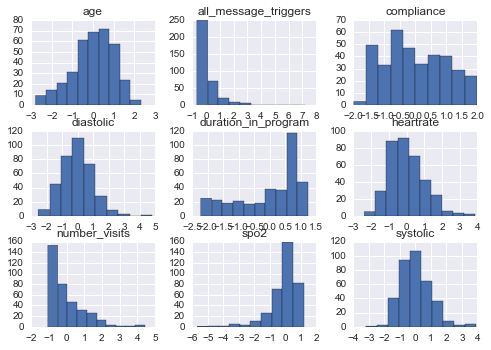

In [14]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
nrmlzr = Normalizer()
stdsclr = StandardScaler()
#good_data[continuous_feats] = nrmlzr.fit_transform(good_data[continuous_feats])
good_data[continuous_feats] = stdsclr.fit_transform(good_data[continuous_feats])
good_data[continuous_feats].hist()

In [17]:
print good_data.shape

(362, 28)


In [33]:
chf_data = good_data[good_data['chf']==1]
print 'CHF', chf_data.shape
copd_data = good_data[good_data['copd']==1]
print 'COPD', copd_data.shape
diab_data = good_data[good_data['diabetes']==1]
print 'diabetes', diab_data.shape
hypert_data = good_data[good_data['hypertension']==1]
print 'hypertension', hypert_data.shape
obesity_data = good_data[good_data['obesity']==1]
print 'obesity', obesity_data.shape
cad_data = good_data[good_data['coronary_artery_disease']==1]
print 'cad', cad_data.shape
falls_data = good_data[good_data['falls']==1]
print 'falls', falls_data.shape
cond0_data = good_data[good_data['n_conds']==0]
print '0 cond', cond0_data.shape
cond1_data = good_data[good_data['n_conds']==1]
print '1 cond', cond1_data.shape
cond2_data = good_data[good_data['n_conds']==2]
print '2 conds', cond2_data.shape
cond3_data = good_data[good_data['n_conds']==3]
print '3 conds', cond3_data.shape
cond4_data = good_data[good_data['n_conds']>=4]
print '4 conds', cond4_data.shape

CHF (14, 28)
COPD (47, 28)
diabetes (86, 28)
hypertension (205, 28)
obesity (35, 28)
cad (40, 28)
falls (8, 28)
0 cond (92, 28)
1 cond (124, 28)
2 conds (87, 28)
3 conds (37, 28)
4 conds (22, 28)


### Small n can yield poor models. 

### CHF

In [22]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(chf_data.drop(['rpm_hospitalized'],axis=1), chf_data['rpm_hospitalized'],
                                                    stratify=chf_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=chf_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.5
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)
0.583333333333
<function _passthrough_scorer at 0x000000000E189A58>
0.5


,coef,exp coef
medicaid,0.583634,1.792541
hospitalized,-0.000499,0.999501
rehospitalized,0.183541,1.201464
chf,-0.048354,0.952796
copd,0.183541,1.201464
diabetes,-0.245169,0.782572
hypertension,0.334246,1.396887
stroke,0.112142,1.118671
falls,0.112142,1.118671
obesity,0.000000,1.000000


## COPD

In [23]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(copd_data.drop(['rpm_hospitalized'],axis=1), copd_data['rpm_hospitalized'],
                                                    stratify=copd_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=copd_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.8
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)
0.761904761905
<function _passthrough_scorer at 0x000000000E189A58>
0.8


,coef,exp coef
medicaid,0.008033,1.008065
hospitalized,0.235890,1.266035
rehospitalized,0.000000,1.000000
chf,0.000000,1.000000
copd,0.000000,1.000000
diabetes,-0.876419,0.416271
hypertension,0.000000,1.000000
stroke,0.000000,1.000000
falls,0.000000,1.000000
obesity,0.000000,1.000000


### Diabetes

In [24]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diab_data.drop(['rpm_hospitalized'],axis=1), diab_data['rpm_hospitalized'],
                                                    stratify=diab_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=diab_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.666666666667
LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)
0.844155844156
<function _passthrough_scorer at 0x000000000E189A58>
0.666666666667


,coef,exp coef
medicaid,0.638783,1.894174
hospitalized,-0.839191,0.432060
rehospitalized,-0.086873,0.916793
chf,-0.152425,0.858623
copd,-0.656975,0.518417
diabetes,-0.232808,0.792305
hypertension,-0.086751,0.916906
stroke,-0.351895,0.703354
falls,0.288975,1.335059
obesity,0.251806,1.286346


## Hypertension

In [25]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hypert_data.drop(['rpm_hospitalized'],axis=1), hypert_data['rpm_hospitalized'],
                                                    stratify=hypert_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=hypert_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.714285714286
LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.782608695652
<function _passthrough_scorer at 0x000000000E189A58>
0.761904761905


,coef,exp coef
medicaid,0.862291,2.368581
hospitalized,0.048069,1.049243
rehospitalized,0.000000,1.000000
chf,0.000000,1.000000
copd,0.000000,1.000000
diabetes,-0.116051,0.890430
hypertension,-0.321435,0.725107
stroke,0.161617,1.175410
falls,0.000000,1.000000
obesity,0.000000,1.000000


## Obesity

In [26]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(obesity_data.drop(['rpm_hospitalized'],axis=1), obesity_data['rpm_hospitalized'],
                                                    stratify=obesity_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=obesity_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

1.0
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)
0.806451612903
<function _passthrough_scorer at 0x000000000E189A58>
1.0


,coef,exp coef
medicaid,0.220246,1.246383
hospitalized,0.695815,2.005342
rehospitalized,-0.042580,0.958314
chf,0.000000,1.000000
copd,-0.192893,0.824570
diabetes,-0.290651,0.747777
hypertension,0.047297,1.048433
stroke,0.237180,1.267669
falls,0.000000,1.000000
obesity,0.084282,1.087935


## Coronary artery disease

In [34]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cad_data.drop(['rpm_hospitalized'],axis=1), cad_data['rpm_hospitalized'],
                                                    stratify=cad_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=cad_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.75
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)
0.861111111111
<function _passthrough_scorer at 0x000000000E189A58>
0.75


,coef,exp coef
medicaid,0.076852,1.079882
hospitalized,-0.549233,0.577393
rehospitalized,0.258023,1.294369
chf,0.036863,1.037551
copd,-0.056772,0.944810
diabetes,-0.298721,0.741767
hypertension,-0.112091,0.893963
stroke,-0.239525,0.787001
falls,0.037494,1.038206
obesity,0.272926,1.313803


## No chronic conditions

In [27]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cond0_data.drop(['rpm_hospitalized'],axis=1), cond0_data['rpm_hospitalized'],
                                                    stratify=cond0_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=cond0_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.9
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.01,
          verbose=0, warm_start=False)
0.829268292683
<function _passthrough_scorer at 0x000000000E189A58>
0.9


,coef,exp coef
medicaid,0.060717,1.062598
hospitalized,-0.070476,0.931951
rehospitalized,0.041141,1.041999
chf,0.000000,1.000000
copd,0.000000,1.000000
diabetes,0.000000,1.000000
hypertension,0.000000,1.000000
stroke,0.000000,1.000000
falls,0.000000,1.000000
obesity,0.000000,1.000000


## 1 chronic condition

In [28]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cond1_data.drop(['rpm_hospitalized'],axis=1), cond1_data['rpm_hospitalized'],
                                                    stratify=cond1_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=cond1_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.923076923077
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)
0.801801801802
<function _passthrough_scorer at 0x000000000E189A58>
0.923076923077


,coef,exp coef
medicaid,1.694059,5.441522
hospitalized,0.000000,1.000000
rehospitalized,0.000000,1.000000
chf,0.000000,1.000000
copd,0.000000,1.000000
diabetes,0.000000,1.000000
hypertension,0.000000,1.000000
stroke,0.000000,1.000000
falls,0.000000,1.000000
obesity,0.000000,1.000000


## 2 chronic conditions

In [29]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cond2_data.drop(['rpm_hospitalized'],axis=1), cond2_data['rpm_hospitalized'],
                                                    stratify=cond2_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=cond2_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.888888888889
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)
0.807692307692
<function _passthrough_scorer at 0x000000000E189A58>
0.888888888889


,coef,exp coef
medicaid,0.630095,1.877789
hospitalized,-0.022325,0.977922
rehospitalized,0.000000,1.000000
chf,0.000000,1.000000
copd,0.000000,1.000000
diabetes,-0.185053,0.831060
hypertension,0.000000,1.000000
stroke,0.000000,1.000000
falls,0.000000,1.000000
obesity,-0.220140,0.802407


## 3 chronic conditions

In [30]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cond3_data.drop(['rpm_hospitalized'],axis=1), cond3_data['rpm_hospitalized'],
                                                    stratify=cond3_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=cond3_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

1.0
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)
0.909090909091
<function _passthrough_scorer at 0x000000000E189A58>
1.0


,coef,exp coef
medicaid,0.161612,1.175404
hospitalized,0.615728,1.851004
rehospitalized,-0.023295,0.976975
chf,0.190877,1.210311
copd,-0.032456,0.968065
diabetes,-0.401095,0.669587
hypertension,-0.208375,0.811902
stroke,0.114923,1.121787
falls,-0.084995,0.918517
obesity,0.143898,1.154766


## 4 chronic conditions or more

In [31]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cond4_data.drop(['rpm_hospitalized'],axis=1), cond4_data['rpm_hospitalized'],
                                                    stratify=cond4_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=cond4_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.333333333333
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)
0.526315789474
<function _passthrough_scorer at 0x000000000E189A58>
1.0


,coef,exp coef
medicaid,0.000000,1.000000
hospitalized,0.000000,1.000000
rehospitalized,0.000000,1.000000
chf,0.000000,1.000000
copd,-0.120165,0.886774
diabetes,-0.794151,0.451965
hypertension,0.000000,1.000000
stroke,0.000000,1.000000
falls,0.000000,1.000000
obesity,0.000000,1.000000
